In [1]:
# data reading and processing

In [37]:
# import math and numpy first
import pandas as pd
import numpy as np
import scipy
import re
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix , precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification

In [38]:
# read in file
data=pd.read_csv('mbti_1.csv')
data.head()

data[0:10]

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [39]:
# basic stats about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8674 entries, 0 to 8673
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8674 non-null   object
 1   posts   8674 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [40]:
# basic stats about each column
data.describe()

,type,posts
count,8674,8674
unique,16,8674
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [41]:
# array of each of the mbti types
mbti_types = data['type'].unique()

# get counts for each of the mbti types
class_count = data['type'].value_counts()

Text(0.5, 0, 'MBTI Types')

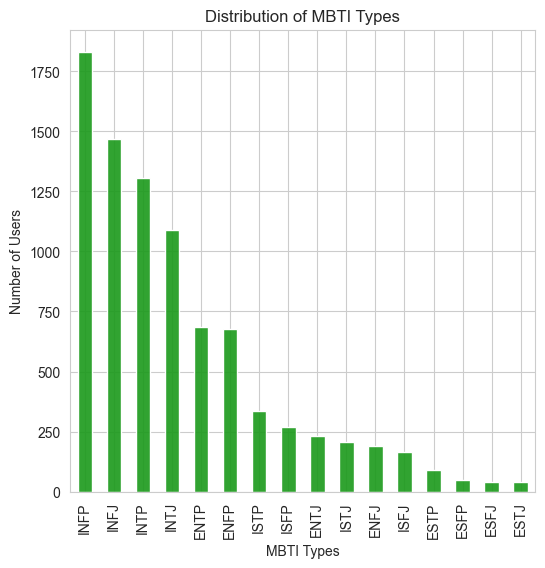

In [42]:
# understanding makeup of dataset in graphical form
data['type'].value_counts().plot(kind="bar", figsize=(6,6),color = (0.1,0.6,0.1,0.9))
plt.title("Distribution of MBTI Types")
plt.ylabel("Number of Users")
plt.xlabel("MBTI Types")

Text(0.5, 0, 'Number of Words per Post')

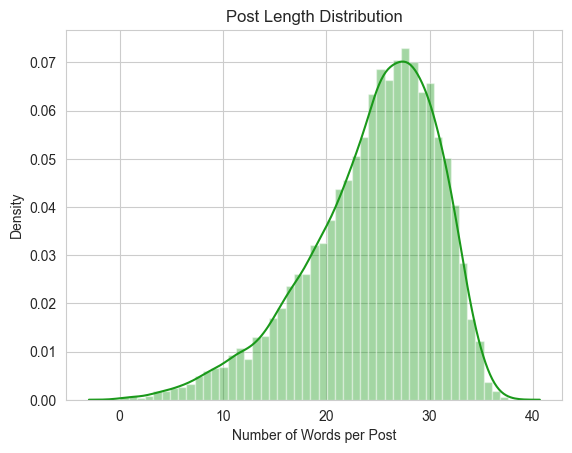

In [43]:
# graphical representation of the distribution of the number of words in all posts
data['posts'].apply(len)

sns.distplot(data['posts'].apply(lambda x: len(x.split())/50),color = (0.1,0.6,0.1,0.9))
plt.title("Post Length Distribution")
plt.ylabel("Density")
plt.xlabel("Number of Words per Post")

Text(0.5, 0, 'Number of Words per 50 Posts')

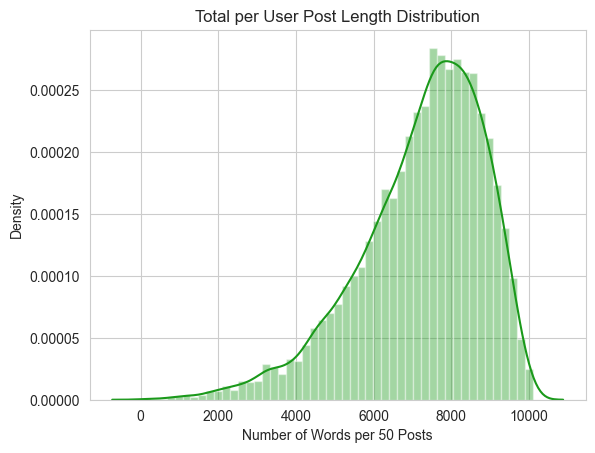

In [44]:
# graphical representation of the distribution of the lengths of the posts
data['posts'].apply(len)
sns.distplot(data['posts'].apply(len),color = (0.1,0.6,0.1,0.9))
plt.title("Total per User Post Length Distribution")
plt.ylabel("Density")
plt.xlabel("Number of Words per 50 Posts")

In [45]:
# Dataset cleaning - removing links, symbols, MBTI types and making lowercase
def text_cleaning(data):
    # removing links from text data
    data['posts'] = data['posts'].apply(lambda x: re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+'," ",x.replace("|"," ") + " "))
    
    # removing other symbols
    data['posts'] = data['posts'].apply(lambda x: re.sub("'","",x))
    data['posts'] = data['posts'].apply(lambda x: re.sub('[^0-9a-z]'," ",x.replace("|"," ") + " "))
    
    # making all words lowercase
    data['posts'] = data['posts'].apply(lambda x: x.lower())
    
    # removing any mention of MBTI types
    for type in mbti_types:
        data['posts'] = data['posts'].str.replace(type.lower(),' ', regex=False)
    
text_cleaning(data)
print(data.head())

   type                                              posts
0  INFJ            and   moments     sportscenter not t...
1  ENTP   m finding the lack of me in these posts very ...
2  INTP   ood one               f course  to which   sa...
3  INTJ   ear           enjoyed our conversation the ot...
4  ENTJ   oure fired     hats another silly misconcepti...


In [46]:
X = CountVectorizer(stop_words = 'english').fit_transform(data["posts"])
data['type_num'] = LabelEncoder().fit_transform(data['type'])
y = data['type_num']

print(data.head())
print(y)
print(X.shape)

   type                                              posts  type_num
0  INFJ            and   moments     sportscenter not t...         8
1  ENTP   m finding the lack of me in these posts very ...         3
2  INTP   ood one               f course  to which   sa...        11
3  INTJ   ear           enjoyed our conversation the ot...        10
4  ENTJ   oure fired     hats another silly misconcepti...         2
0        8
1        3
2       11
3       10
4        2
        ..
8669    13
8670     1
8671    11
8672     9
8673     9
Name: type_num, Length: 8674, dtype: int64
(8674, 116554)


In [47]:
# conducting train_test_split before fixing class imbalance
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, stratify=y, random_state=5)

In [85]:
# conduct undersampling first
#n_samples = class_count.median().astype(np.int64)
n_samples = 1020

In [86]:
def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

In [87]:
under_sampler = ClusterCentroids(sampling_strategy=sampling_strategy(X_train,y_train,n_samples,t='majority'))
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

In [88]:
# conduct oversampling second
#SMOTE algorithm to handle class imbalance
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print("Before: " , counter)

over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

Before:  Counter({14: 720, 4: 720, 0: 720, 13: 720, 15: 720, 7: 720, 9: 720, 3: 720, 6: 720, 11: 720, 12: 720, 10: 720, 8: 720, 1: 720, 5: 720, 2: 720})


In [89]:
# conducting train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size = 0.1, stratify=y_bal, random_state=5)

counter = Counter(y_train)
print("After: " , counter)

After:  Counter({7: 918, 2: 918, 10: 918, 12: 918, 0: 918, 1: 918, 15: 918, 8: 918, 4: 918, 13: 918, 14: 918, 5: 918, 11: 918, 9: 918, 6: 918, 3: 918})


In [90]:
accuracies = {}
#linear support vector machine classifier using SGD training
svm = SGDClassifier(max_iter=10, tol=None)
svm.fit(X_train, y_train)
Y_prediction = svm.predict(X_test)
# svm.score(X_test, y_test)
acc_svm = round(svm.score(X_test, y_test) * 100, 2)
accuracies["SVM"] = acc_svm
print(round(acc_svm,2,), "%")

84.8 %


In [91]:
# calculating precision and recall for svm

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.8473119037891903
0.8562098230797333
0.8480392156862745


In [92]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 50)
decision_tree.fit(X_train,y_train)

Y_prediction = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
accuracies["Decision Tree"] = acc_decision_tree
print(round(acc_decision_tree,2,), "%")

68.57 %


In [93]:
# calculating precision and recall for dt

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.6859300124871006
0.6876397393591169
0.6856617647058822


In [94]:
# Random Forest - ensemble of decision trees
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
accuracies["Random Forest"] = acc_random_forest
print(round(acc_random_forest,2,), "%")

83.88 %


In [95]:
# calculating precision and recall for rf

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.8431201113598494
0.8521324282607978
0.8388480392156863


In [96]:
# Logistic Regression
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train, y_train)

Y_prediction = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, y_test) * 100, 2)
accuracies["Logistic Regression"] = acc_log
print(round(acc_log,2,), "%")

84.31 %


In [97]:
# calculating precision and recall for log reg

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.8424017823798117
0.8437380781887553
0.8431372549019608


In [98]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

Y_prediction = knn.predict(X_test)

acc_knn = round(knn.score(X_test, y_test) * 100, 2)
accuracies["KNN"] = acc_knn
print(round(acc_knn,6,), "%")

85.6 %


In [99]:
# calculating precision and recall for knn

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.852120753005696
0.8559080256124896
0.8560049019607843


In [100]:
#Naive Bayes
NB = MultinomialNB()
NB.fit(X_train.toarray(), y_train)
Y_prediction = NB.predict(X_test.toarray())
acc_nb = round(NB.score(X_test.toarray(), y_test) * 100, 2)
accuracies["Naive Bayes"] = acc_nb
print(round(acc_nb,2,), "%")

64.77 %


In [101]:
# calculating precision and recall for nb

# For each class
precision = 0
recall = 0

average_precision = 0

print(f1_score(y_test, Y_prediction, average="macro"))
print(precision_score(y_test, Y_prediction, average="macro"))
print(recall_score(y_test, Y_prediction, average="macro"))

0.6599798900727136
0.7684739671718508
0.647671568627451


                     Accuracies(%)
SVM                          84.80
Decision Tree                68.57
Random Forest                83.88
Logistic Regression          84.31
KNN                          85.60
Naive Bayes                  64.77


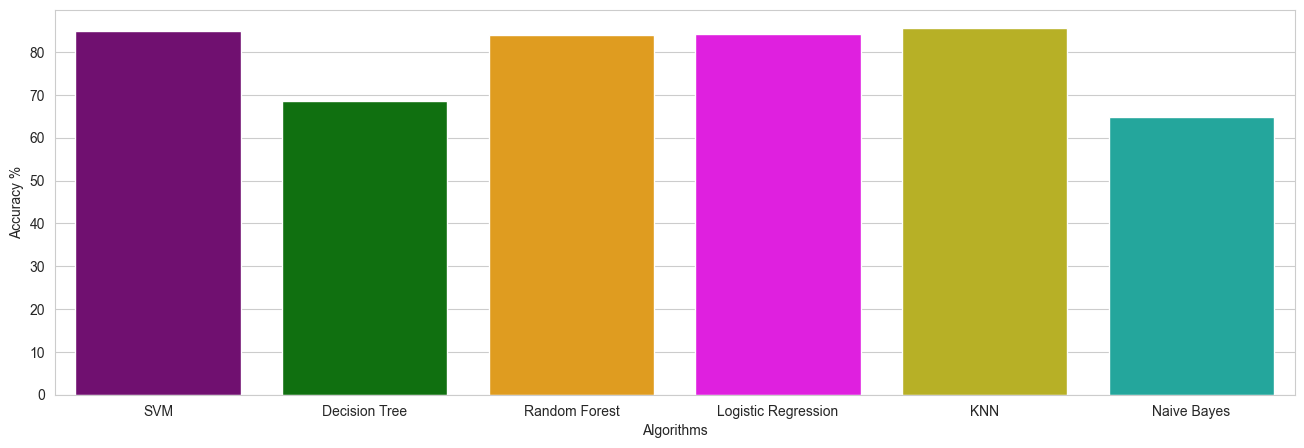

In [102]:
# plotting classifier accuracies as percentages
print(pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)']))

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [103]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
%matplotlib inline
import matplotlib.pyplot as plt

def print_results(method, k_range, train_accuracy, test_accuracy):
    if method == "SVM":
        print("Iterations, Train Accuracy, Test Accuracy")
        for i in range(len(k_range)):
            print(k_range[i], str(f'{train_accuracy[i]:.3f}'), str(f'{test_accuracy[i]:.3f}'))
            
    elif method == "RF":
        print("Trees, Train Accuracy, Test Accuracy")
        for i in range(len(k_range)):
            print(k_range[i], str(f'{train_accuracy[i]:.3f}'), str(f'{test_accuracy[i]:.3f}'))
            
    elif method == "KNN":
        print("Neighbors, Train Accuracy, Test Accuracy")
        for i in range(len(k_range)):
            print(k_range[i], str(f'{train_accuracy[i]:.3f}'), str(f'{test_accuracy[i]:.3f}'))
            
def plot_data(method, k_range, train_accuracy, test_accuracy): 
    if method == "SVM":
        plt.title("SVM Validation Curve", fontsize="xx-large")
        plt.xlabel("max_iter",fontsize="large")
        plt.ylabel("Accuracy",fontsize="large")
        plt.ylim(0.0, 1.1)
        plt.xticks(k_range)

        plt.plot(k_range, train_accuracy, label="Training score", color="darkorange")
        plt.plot(k_range, test_accuracy, label="Cross-validation score", color="navy")

        plt.legend(loc="best")
        plt.show()
        
    elif method == "RF":
        plt.title("Random Forest Validation Curve", fontsize="xx-large")
        plt.xlabel("n_estimators",fontsize="large")
        plt.ylabel("Accuracy",fontsize="large")
        plt.ylim(0.0, 1.1)
        plt.xticks(k_range)

        plt.plot(k_range, train_accuracy, label="Training score", color="darkorange")
        plt.plot(k_range, test_accuracy, label="Cross-validation score", color="navy")

        plt.legend(loc="best")
        plt.show()
        
    elif method == "KNN":
        plt.title("K-nearest Neighbors Validation Curve", fontsize="xx-large")
        plt.xlabel("n_neighbors",fontsize="large")
        plt.ylabel("Accuracy",fontsize="large")
        plt.ylim(0.0, 1.1)
        plt.xticks(k_range)

        plt.plot(k_range, train_accuracy, label="Training score", color="darkorange")
        plt.plot(k_range, test_accuracy, label="Cross-validation score", color="navy")

        plt.legend(loc="best")
        plt.show()
        
    
            
def generateCurves(dataSetName,method):
    """
    The purpose of this function is to generate validation curves in order to visualize the impact of hyperparameters on the model.
    param X,y: mbtiDataset data and target 
    param method: method to be used
    """
    
    #random forest classifier
    if method == "RF" :
        #create Random Forests classifier and run train/tune/test pipeline 
        forestB = RandomForestClassifier(n_estimators = 101)
        paramForest = {"n_estimators":[1,51,101,151,201]}
        train_scores, test_scores = validation_curve(forestB, X_train, y_train, param_name="n_estimators", param_range=paramForest["n_estimators"],cv=5,n_jobs=3)
        rf_range = np.arange(1, 201, 10, dtype = int)
        printPretty(train_scores, test_scores, ['Estimators', 'Train Accuracy', 'Test Accuracy'], rf_range)
        plt.title("RF Validation Curve", fontsize="xx-large")
        plt.xlabel("n_estimators",fontsize="large")
        plotCurve(train_scores, test_scores, paramForest["n_estimators"])

    #k-nearest neighbor 
    elif method == "KNN":
        #create KNN classifier and run train/tune/test pipeline
        classifierB = KNeighborsClassifier(metric='euclidean',n_neighbors=5)
        parametersKNN = {"weights":["uniform","distance"], "n_neighbors":[1,5,11]}
        train_scores3, test_scores3 = validation_curve(classifierB, X_train, y_train, param_name="n_neighbors", param_range=parametersKNN["n_neighbors"],cv=5,n_jobs=3)
        knn_range = np.arange(1, 12, 1, dtype = int)
        
        printPretty(train_scores3, test_scores3, ['Neighbors', 'Train Accuracy', 'Test Accuracy'], knn_range)
        plt.title("KNN Validation Curve", fontsize="xx-large")
        plt.xlabel("n_neighbors",fontsize="large")
        plotCurve(train_scores3, test_scores3, parametersKNN["n_neighbors"])

    #SVM
    elif method == "SVM":
        svm = SGDClassifier(max_iter=10, tol=None)
        param = {"max_iter":[1,5,10, 15, 20, 25, 30]}
        svm_range = np.arange(1, 31, 1).astype('int') #max_depth range
        
        #generate the data for validation curves 
        train_scores, test_scores = validation_curve(svm, X_train, y_train, param_name="max_iter", param_range=param["max_iter"], cv=3) 
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)

        #print results and graph
        printPretty(train_scores, test_scores, ['Iterations', 'Train Accuracy', 'Test Accuracy'], svm_range)
        plt.title("SVM Validation Curve", fontsize="xx-large")
        plt.xlabel("max_iter",fontsize="large")
        plotCurve(train_scores, test_scores, param["max_iter"])

        
# A helper function to print a table of the parameter value, train accuracies, and test accuracies
def printPretty(train_scores, test_scores, header, clf_range):
    prettyList = []
    k = 0
    for i in range(len(test_scores)-1):
        for j in range(len(test_scores[i])):
            prettyList.append([clf_range[k], np.round(train_scores[i][j],3), np.round(test_scores[i][j],3)])
            k += 1
    
    print(tabulate(prettyList,headers=header))
    print(" ")
    
# A helper function to plot the accuracies
def plotCurve(train_scores, test_scores, range):
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.ylabel("Accuracy",fontsize="large")
    plt.ylim(0.0, 1.1)
    plt.xticks(range)
    plt.plot(range, train_scores_mean, label="Training score", color="darkorange")
    plt.plot(range, test_scores_mean, label="Cross-validation score", color="navy")

    plt.legend(loc="best")
    plt.show()

  Estimators    Train Accuracy    Test Accuracy
------------  ----------------  ---------------
           1             0.85             0.586
          11             0.845            0.571
          21             0.842            0.585
          31             0.848            0.589
          41             0.844            0.577
          51             0.999            0.815
          61             0.999            0.802
          71             0.999            0.807
          81             0.999            0.807
          91             0.999            0.811
         101             0.999            0.844
         111             0.999            0.834
         121             0.999            0.832
         131             0.999            0.836
         141             0.999            0.84
         151             0.999            0.855
         161             0.999            0.85
         171             0.999            0.848
         181             0.999            

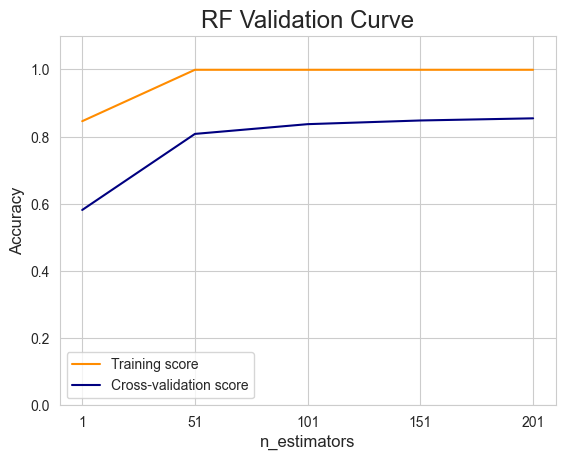

In [104]:
generateCurves("mbti","RF")

  Iterations    Train Accuracy    Test Accuracy
------------  ----------------  ---------------
           1             0.618            0.524
           2             0.715            0.615
           3             0.615            0.521
           4             0.931            0.775
           5             0.818            0.665
           6             0.89             0.724
           7             0.971            0.808
           8             0.946            0.788
           9             0.975            0.814
          10             0.984            0.821
          11             0.981            0.82
          12             0.978            0.82
          13             0.987            0.824
          14             0.988            0.824
          15             0.989            0.823
          16             0.989            0.823
          17             0.99             0.838
          18             0.994            0.837
 


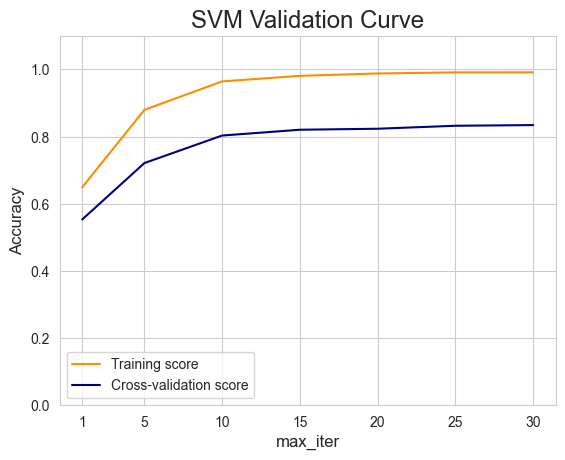

In [105]:
generateCurves("mbti","SVM")

  Neighbors    Train Accuracy    Test Accuracy
-----------  ----------------  ---------------
          1             0.998            0.913
          2             0.999            0.924
          3             0.999            0.909
          4             0.999            0.912
          5             0.999            0.909
          6             0.895            0.822
          7             0.891            0.825
          8             0.894            0.82
          9             0.894            0.816
         10             0.896            0.818
 


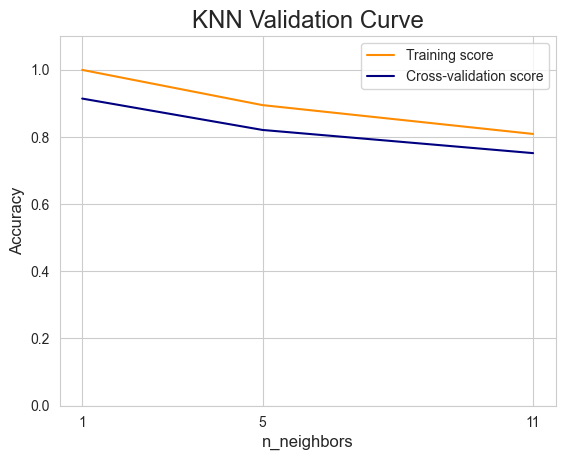

In [106]:
generateCurves("mbti","KNN")

In [107]:
knn = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

size = len(np.unique(y_test))

matrix = np.zeros((size, size))

test_labels_array = np.asarray(y_test)

for i in range(len(y_test)):
    matrix[test_labels_array[i]][predictions[i]] += 1
    
print(matrix)

confMat = confusion_matrix(y_test, predictions)
print(confMat)

[[ 99.   1.   0.   0.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.
    0.   0.]
 [  6.  78.   2.   2.   0.   0.   0.   0.   2.   4.   2.   1.   1.   1.
    2.   1.]
 [  0.   0. 100.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
    0.   1.]
 [  0.   3.   0.  82.   1.   0.   0.   2.   3.   1.   2.   2.   2.   1.
    2.   1.]
 [  0.   0.   0.   0. 102.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0. 102.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0. 102.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 101.   0.   0.   1.   0.   0.   0.
    0.   0.]
 [  1.   2.   0.   1.   1.   0.   0.   0.  91.   4.   1.   0.   1.   0.
    0.   0.]
 [  4.   3.   1.   0.   0.   0.   0.   0.   2.  88.   1.   0.   0.   1.
    1.   1.]
 [  0.   3.   1.   0.   1.   1.   2.   1.   3.   2.  82.   0.   3.   1.
    1.   1.]
 [  1.   1.   1.   1.   0.   0.   0.   1.   5.   1.   1.  84.   1

In [108]:
# code to make confusion matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, ax=ax):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<Figure size 640x480 with 0 Axes>

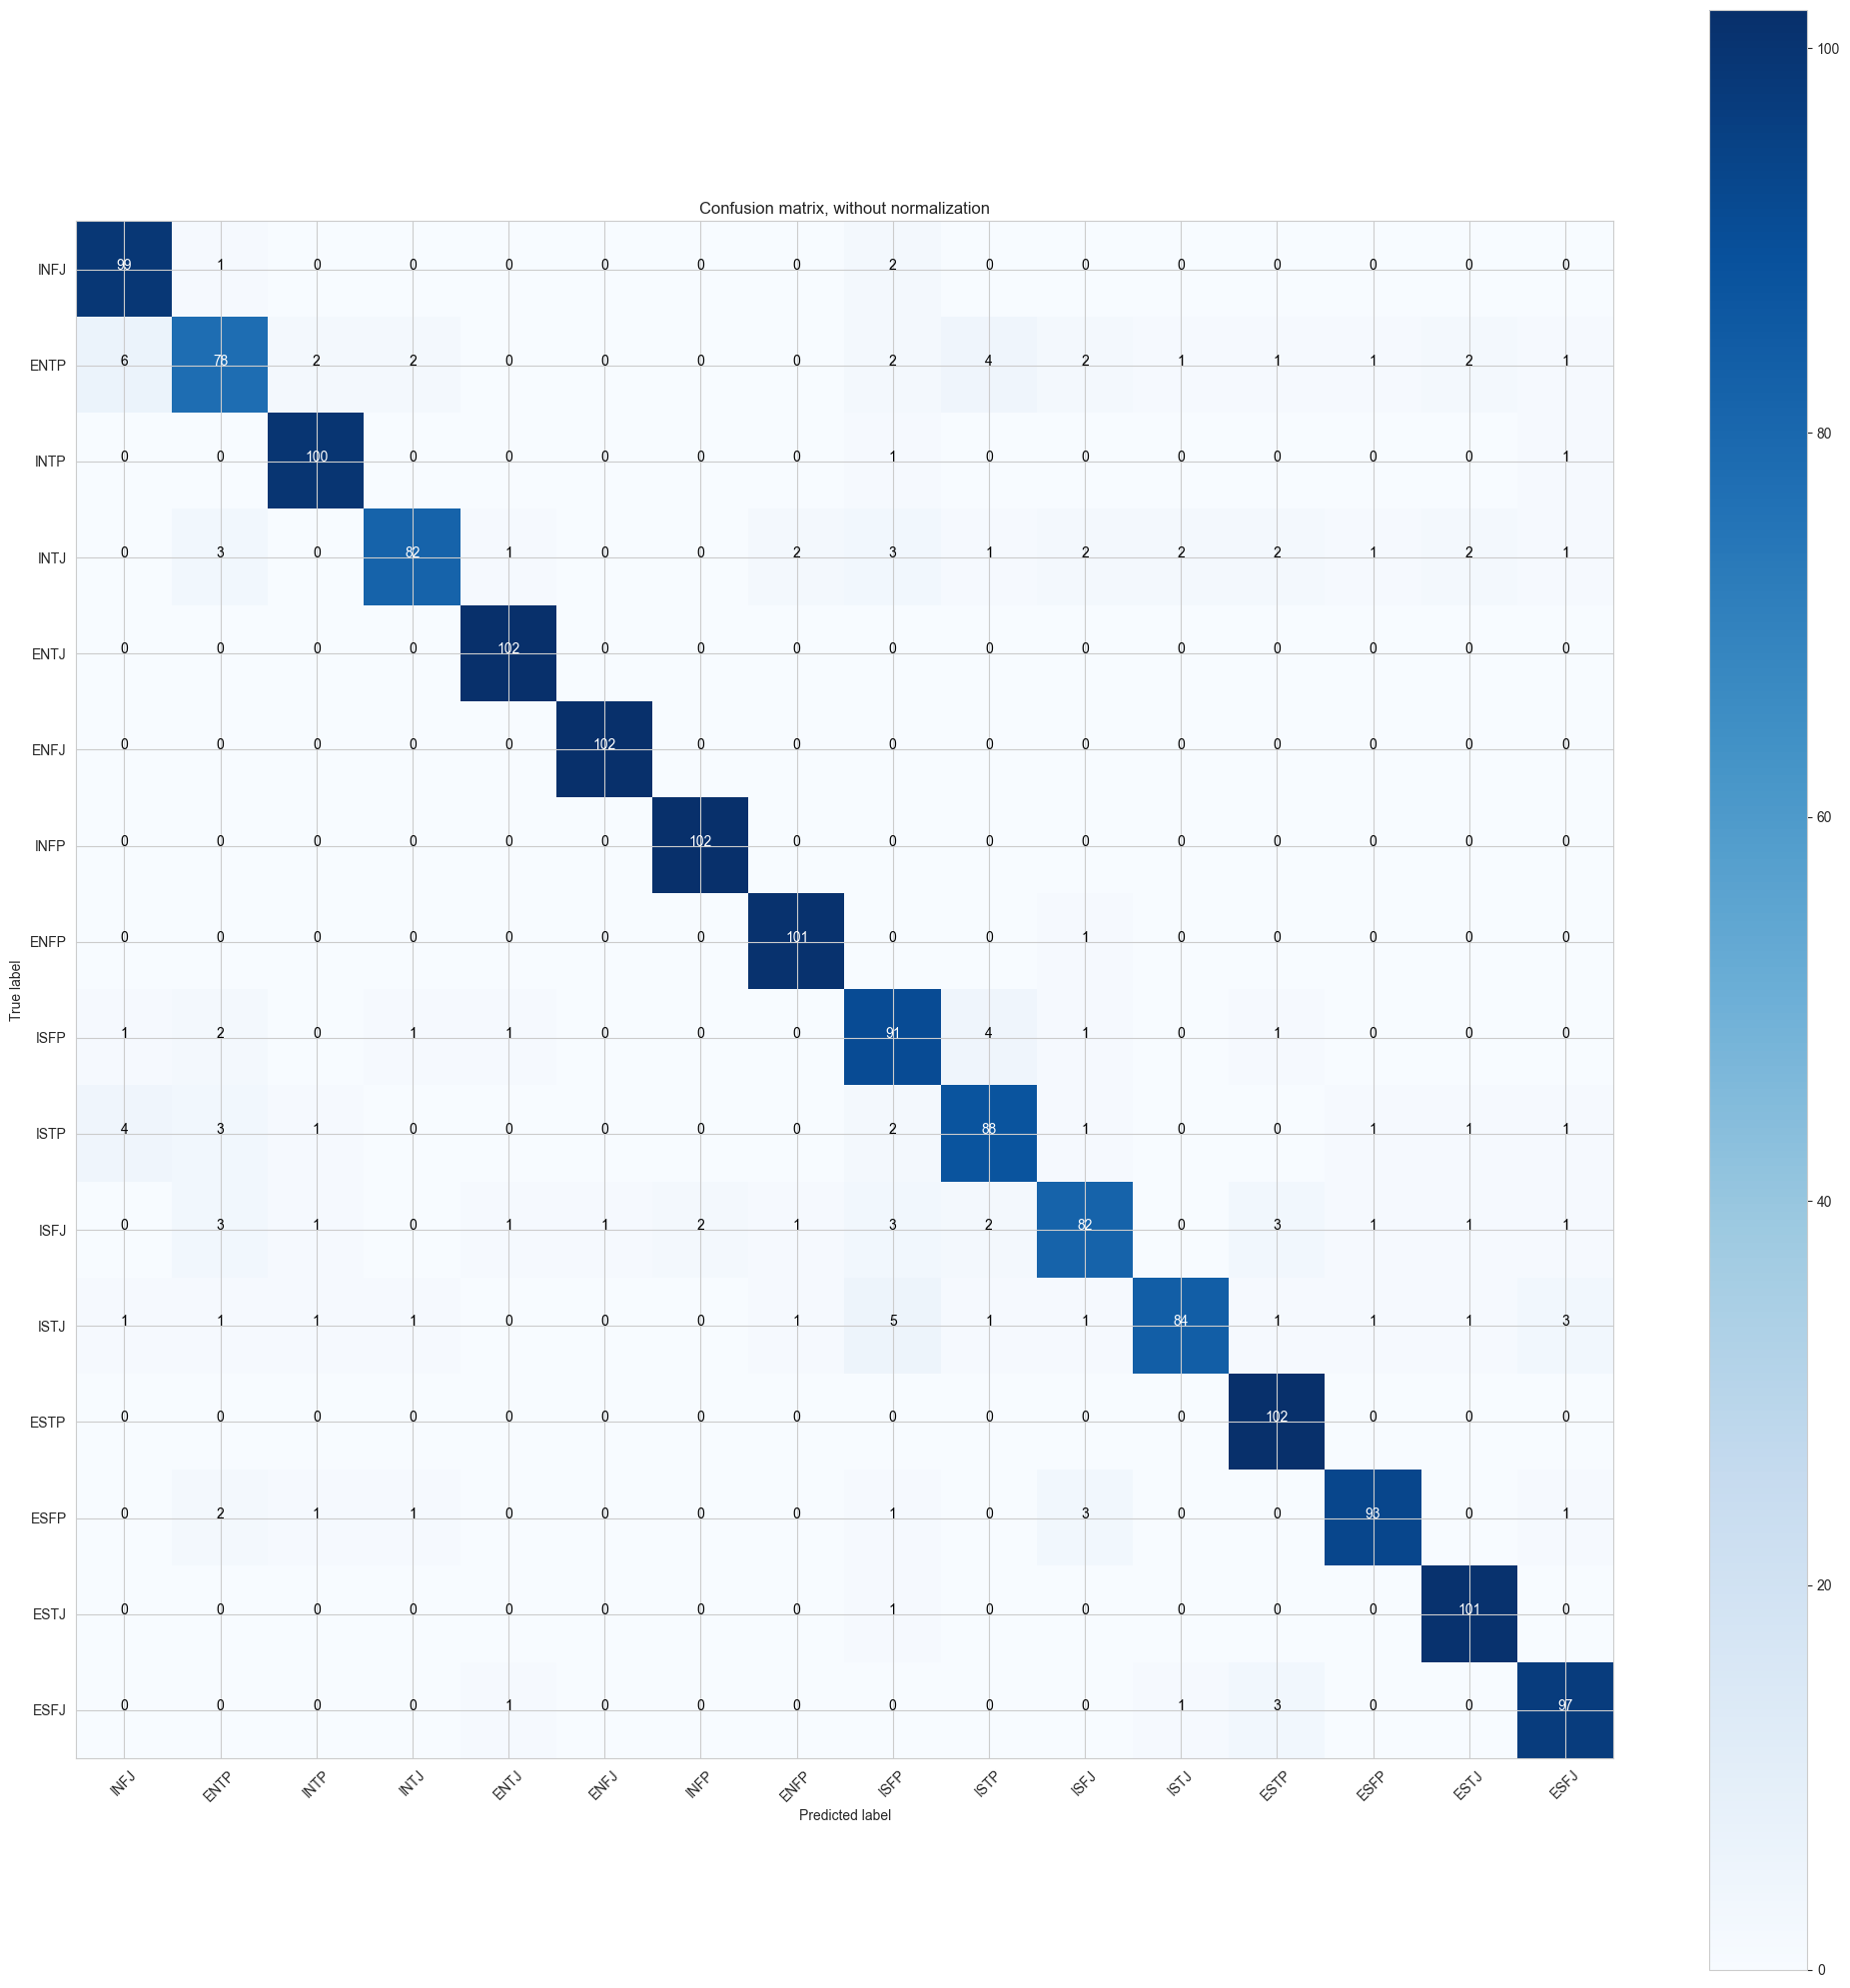

<Figure size 640x480 with 0 Axes>

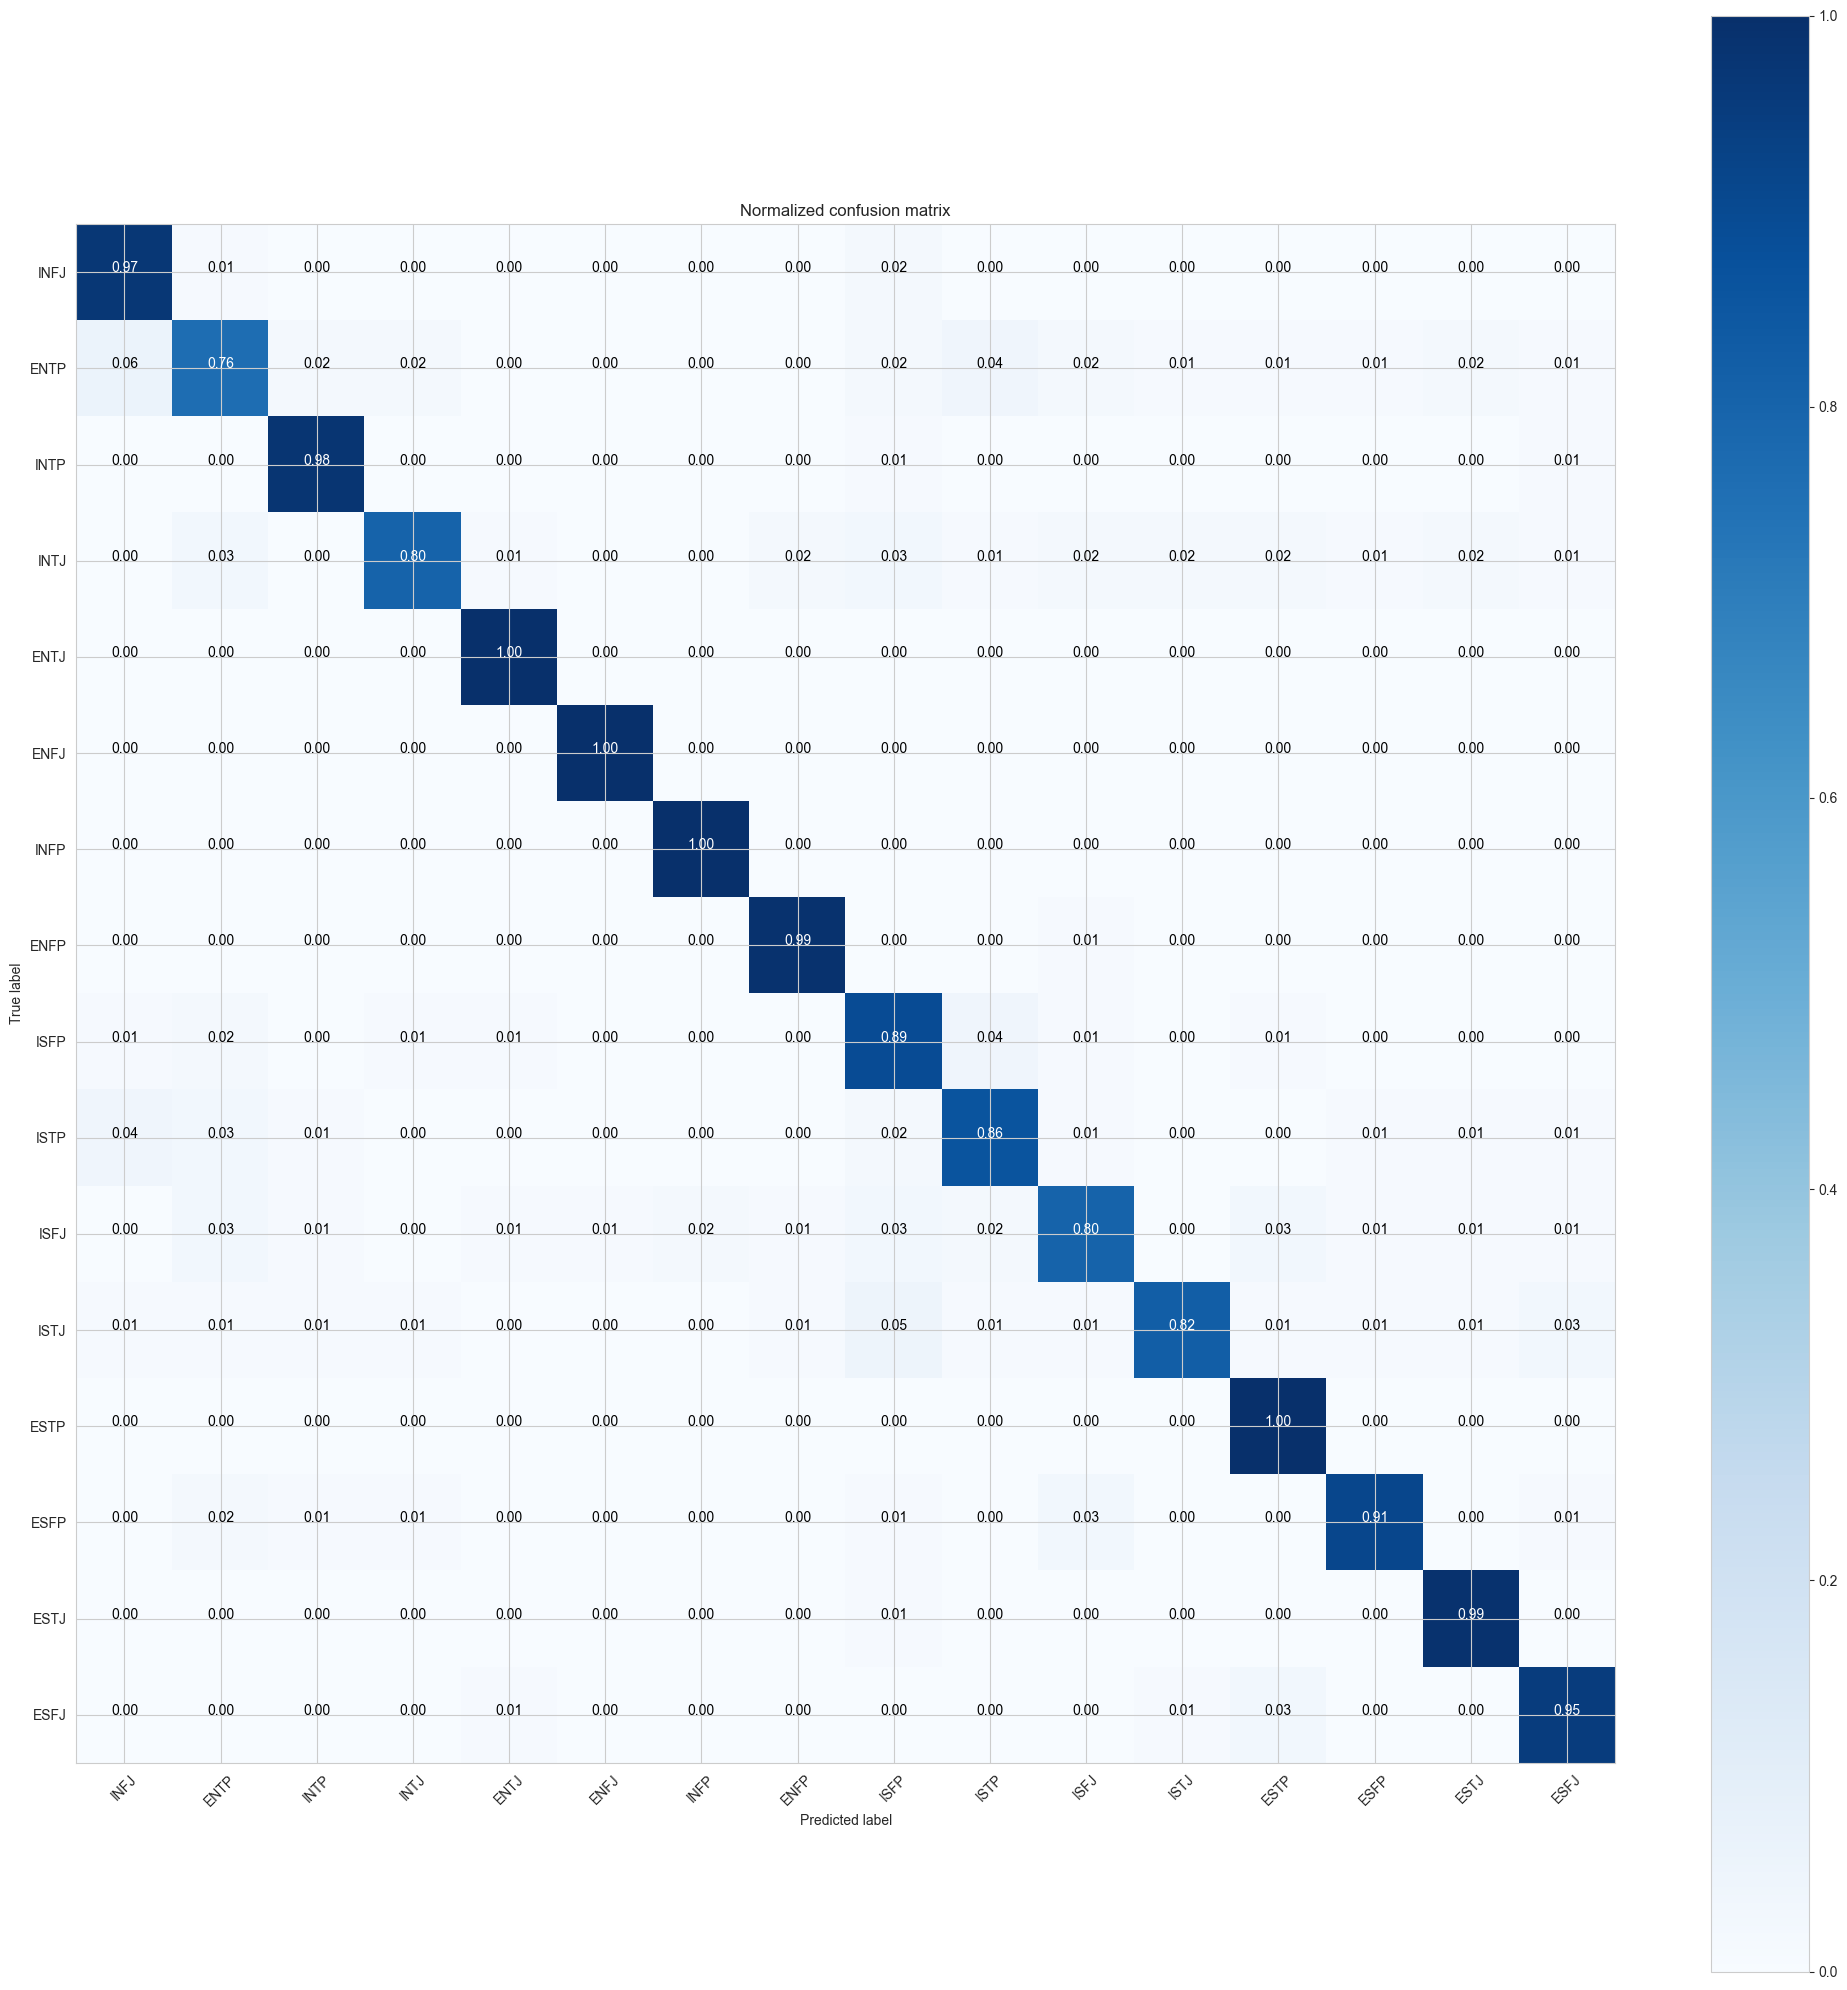

In [109]:
# Plot non-normalized confusion matrix
plt.figure()
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(confMat, classes=mbti_types,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(confMat, classes=mbti_types, normalize=True,
                      title='Normalized confusion matrix')

plt.show()